# <center> Training, validation and test datasets </center>

## Importing libraries

In [1]:
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import os
from osgeo import gdal
from PIL import Image
import rasterio
import rasterio.plot
import random
from myfunctions import geoCoord2PixelPosition2, geoCoord2PixelPosition, diagonalcorners

print('Libraries successfully imported!')

Libraries successfully imported!


## Setting random seed

In [2]:
random.seed(10)

## Emptying image folders

In [3]:
# list of png images in data folders
folders = ['../data/train/*.png',
           '../data/validation/*.png',
           '../data/test/*.png']

# loop to enter each data folder and remove each .png element
for i in range(len(folders)):
    files = glob.glob(folders[i])
    for f in files:
        os.remove(f)

## Loading the data

In [4]:
# loading shapefiles with geopandas
total = gpd.read_file("../layers/Groundtruth shp corrected/Kolovai-Trees-20180108.shp")
train = gpd.read_file("../layers/Groundtruth shp corrected/train2.shp")
validation = gpd.read_file("../layers/Groundtruth shp corrected/validation2.shp")
test = gpd.read_file("../layers/Groundtruth shp corrected/test2.shp")

# printing shapefile elements and coordinate systems
print(f'The total number of elements is {total.shape[0]}.')
print(f'The train number of elements is {train.shape[0]}.')
print(f'The validation number of elements is {validation.shape[0]}.')
print(f'The test number of elements is {test.shape[0]}.')

print('The data coordinate reference systems are:', total.crs, train.crs, validation.crs, test.crs)

The total number of elements is 11961.
The train number of elements is 1578.
The validation number of elements is 1571.
The test number of elements is 8813.
The data coordinate reference systems are: epsg:4326 epsg:4326 epsg:4326 epsg:4326


## Reprojecting the data into another CRS <br>

https://www.earthdatascience.org/workshops/gis-open-source-python/reproject-vector-data-in-python/

In [5]:
total_3857 = total.to_crs('epsg:3857')
train_3857 = train.to_crs('epsg:3857')
validation_3857 = validation.to_crs('epsg:3857')
test_3857 = test.to_crs('epsg:3857')

print(total_3857.crs, train_3857.crs, validation_3857.crs, test_3857.crs) 

epsg:3857 epsg:3857 epsg:3857 epsg:3857


## Displaying the shapefiles and the RGB

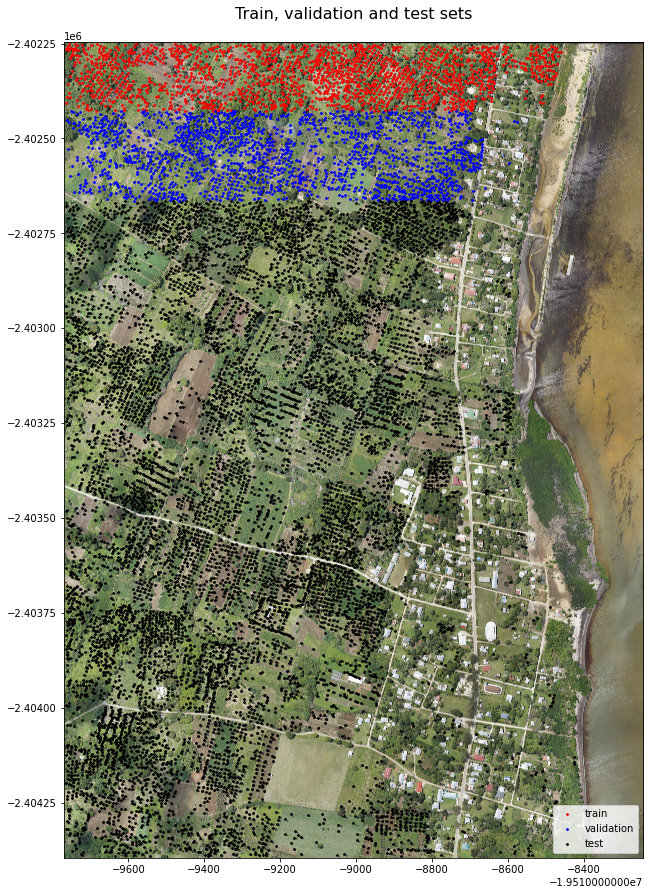

In [6]:
raster = rasterio.open("../layers/Aerial RGB image/rgb_image.tif")

fig, ax = plt.subplots(figsize=(15, 15))

rasterio.plot.show(raster.read(), transform=raster.transform, ax=ax)
train_3857.plot(ax=ax, markersize=3, color = 'red', label = 'train')
validation_3857.plot(ax=ax, markersize=3, color = 'blue', label = 'validation')
test_3857.plot(ax=ax, markersize=3, color = 'black', label = 'test')
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
ax.set_title('Train, validation and test sets\n', fontsize=16, color = 'black')
ax.legend()
#fig.suptitle('Train, validation and test sets', fontsize=16, color = 'black')
plt.show()

## Saving number of elements

In [7]:
total_nb = total_3857.shape[0]
train_nb = train_3857.shape[0]
validation_nb = validation_3857.shape[0]
test_nb = test_3857.shape[0]

## RGB into array and loading metrics

In [8]:
raster_gdal = gdal.Open("../layers/Aerial RGB image/rgb_image.tif")
rasterArray = raster_gdal.ReadAsArray()
rasterArray_reshaped = rasterArray.transpose(1,2,0)

In [9]:
ulx, xres, xskew, uly, yskew, yres  = raster_gdal.GetGeoTransform()
lrx = ulx + (raster_gdal.RasterXSize * xres)
lry = uly + (raster_gdal.RasterYSize * yres)

## Setting palm parameters

In [10]:
palm_number = 1

nb_of_palms = total_3857.shape[0]

## Palm training dataset

In [11]:
train_list_palms = []
train_csv = []
palm = train_3857
window_size = 90
window_radius = int(window_size/2)

palm_indexes_end = palm.shape[0]

for palm_i in range(0, palm_indexes_end):

    saving_name = str(palm_number) + ".png"
    saving_location = "../data/train/"

    xpix, ypix = geoCoord2PixelPosition(palm.geometry.iloc[palm_i], ulx, uly, xres, yres)
    path_to_palm = saving_location + saving_name
    im = Image.fromarray(rasterArray_reshaped[(ypix-window_radius):(ypix+window_radius),(xpix-window_radius):(xpix+window_radius),:], 'RGB')
    im.save(path_to_palm)
    train_list_palms.append(str(palm_number))
    train_csv.append([palm_number,1])

    palm_number = palm_number + 1

The number of files in this directory is 1578.


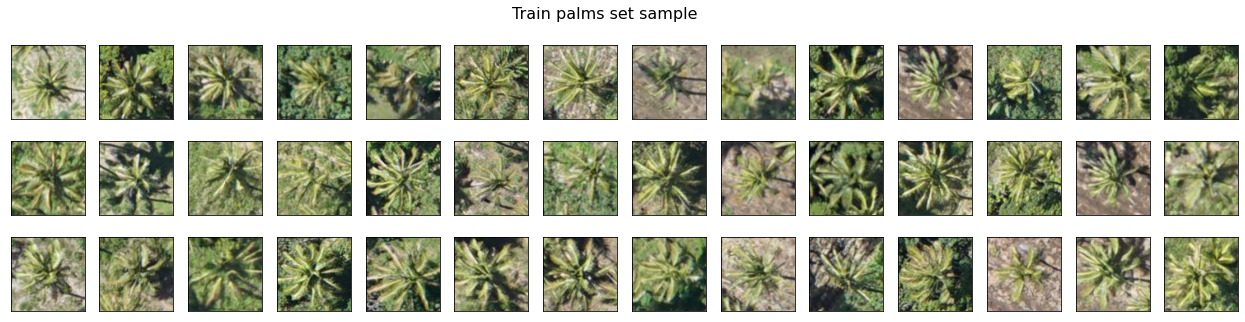

In [12]:
folder = saving_location
imgs = train_list_palms     #os.listdir(folder)
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Train palms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, str(random.choice(imgs)) + '.png')
    img_path2 = os.path.join(folder, str(random.choice(imgs)) + '.png')
    img_path3 = os.path.join(folder, str(random.choice(imgs)) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Palm validation dataset

In [13]:
validation_list_palms = []
validation_csv = []
palm = validation_3857
window_size = 90
window_radius = int(window_size/2)

palm_indexes_end = palm.shape[0]

for palm_i in range(0, palm_indexes_end):

    saving_name = str(palm_number) + ".png"
    saving_location = "../data/validation/"

    xpix, ypix = geoCoord2PixelPosition(palm.geometry.iloc[palm_i], ulx, uly, xres, yres)
    path_to_palm = saving_location + saving_name
    im = Image.fromarray(rasterArray_reshaped[(ypix-window_radius):(ypix+window_radius),(xpix-window_radius):(xpix+window_radius),:], 'RGB')
    im.save(path_to_palm)
    validation_list_palms.append(str(palm_number))
    validation_csv.append([palm_number,1])

    palm_number = palm_number + 1

The number of files in this directory is 1571.


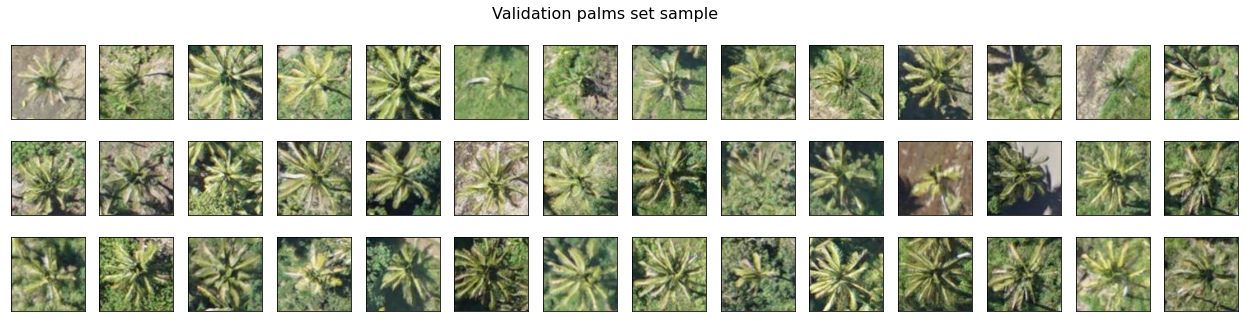

In [14]:
folder = saving_location
imgs = validation_list_palms
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Validation palms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path2 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path3 = os.path.join(folder, random.choice(imgs) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Palm test dataset

In [15]:
test_list_palms = []
test_csv = []
palm = test_3857
window_size = 90
window_radius = int(window_size/2)

palm_indexes_end = palm.shape[0]

for palm_i in range(0, palm_indexes_end):

    saving_name = str(palm_number) + ".png"
    saving_location = "../data/test/"

    xpix, ypix = geoCoord2PixelPosition(palm.geometry.iloc[palm_i], ulx, uly, xres, yres)
    path_to_palm = saving_location + saving_name
    im = Image.fromarray(rasterArray_reshaped[(ypix-window_radius):(ypix+window_radius),(xpix-window_radius):(xpix+window_radius),:], 'RGB')
    im.save(path_to_palm)
    test_list_palms.append(str(palm_number))
    test_csv.append([palm_number,1])

    palm_number = palm_number + 1

The number of files in this directory is 8813.


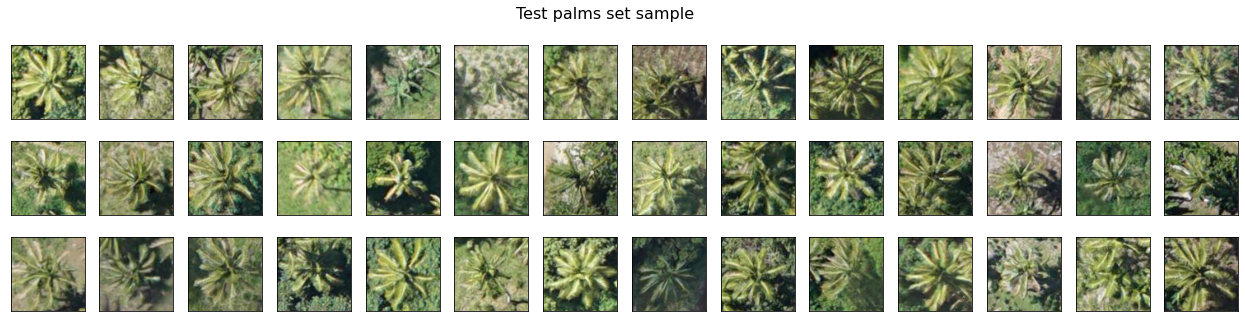

In [16]:
folder = saving_location
imgs = test_list_palms
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Test palms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path2 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path3 = os.path.join(folder, random.choice(imgs) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Palm location matrix

In [17]:
# initializing a matrix of zeros to display location of palms as a pixel of value = 1
palm_locations = np.zeros((raster_gdal.RasterYSize, raster_gdal.RasterXSize), dtype= np.int8)

print(f'The shape of the matrix palm_locations is {palm_locations.shape}.')

for i in range(1, nb_of_palms):
    xpix, ypix = geoCoord2PixelPosition(total_3857.geometry.iloc[i], ulx, uly, xres, yres)
    palm_locations[ypix, xpix] = 1

The shape of the matrix palm_locations is (25006, 17761).


## Nopalm train dataset

In [18]:
train_list_nopalms = []
threshold = train_nb
dist_from_edges = 100
palm_location_radius = 60

xpix_min, ypix_max = geoCoord2PixelPosition2(train_3857.geometry.x.min(), train_3857.geometry.y.min(), ulx, uly, xres, yres)
xpix_max, ypix_min = geoCoord2PixelPosition2(train_3857.geometry.x.max(), train_3857.geometry.y.max(), ulx, uly, xres, yres)

i_nopalm = 1
while i_nopalm < threshold+1:
    x_random = random.randint(dist_from_edges, xpix_max - dist_from_edges)
    y_random = random.randint(dist_from_edges + ypix_min, ypix_max - dist_from_edges)    
    palm_presence = palm_locations[(y_random-palm_location_radius):(y_random+palm_location_radius),
                                   (x_random-palm_location_radius):(x_random+palm_location_radius)].sum()
    
    if palm_presence == 0:
        saving_name = str(palm_number) + ".png"
        saving_location = "../data/train/"
        im = Image.fromarray(rasterArray_reshaped[(y_random-45):(y_random+45), (x_random-45):(x_random+45), :], 'RGB')
        im.save(saving_location + saving_name)
        i_nopalm += 1
        train_list_nopalms.append(str(palm_number))
        train_csv.append([palm_number,0])
 
        palm_number = palm_number + 1

The number of files in this directory is 1578.


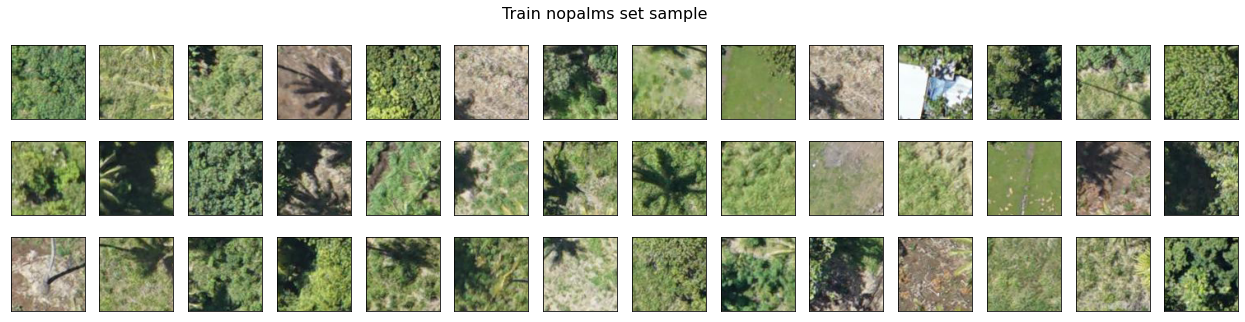

In [19]:
folder = saving_location
imgs = train_list_nopalms
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Train nopalms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path2 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path3 = os.path.join(folder, random.choice(imgs) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Nopalm validation dataset

In [20]:
validation_list_nopalms = []
threshold = validation_nb
dist_from_edges = 100
xpix_min, ypix_max = geoCoord2PixelPosition2(validation_3857.geometry.x.min(), validation_3857.geometry.y.min(), ulx, uly, xres, yres)
xpix_max, ypix_min = geoCoord2PixelPosition2(validation_3857.geometry.x.max(), validation_3857.geometry.y.max(), ulx, uly, xres, yres)

i_nopalm = 1
while i_nopalm < threshold+1:
    x_random = random.randint(dist_from_edges, raster_gdal.RasterXSize - dist_from_edges)
    y_random = random.randint(dist_from_edges + ypix_min, ypix_max - dist_from_edges)    
    palm_presence = palm_locations[(y_random-palm_location_radius):(y_random+palm_location_radius),
                                   (x_random-palm_location_radius):(x_random+palm_location_radius)].sum()
    
    if palm_presence == 0:
        saving_name = str(palm_number) + ".png"
        saving_location = "../data/validation/"
        im = Image.fromarray(rasterArray_reshaped[(y_random-45):(y_random+45), (x_random-45):(x_random+45), :], 'RGB')
        im.save(saving_location + saving_name)
        i_nopalm += 1
        validation_list_nopalms.append(str(palm_number))
        validation_csv.append([palm_number,0])
 
        palm_number = palm_number + 1

The number of files in this directory is 1571.


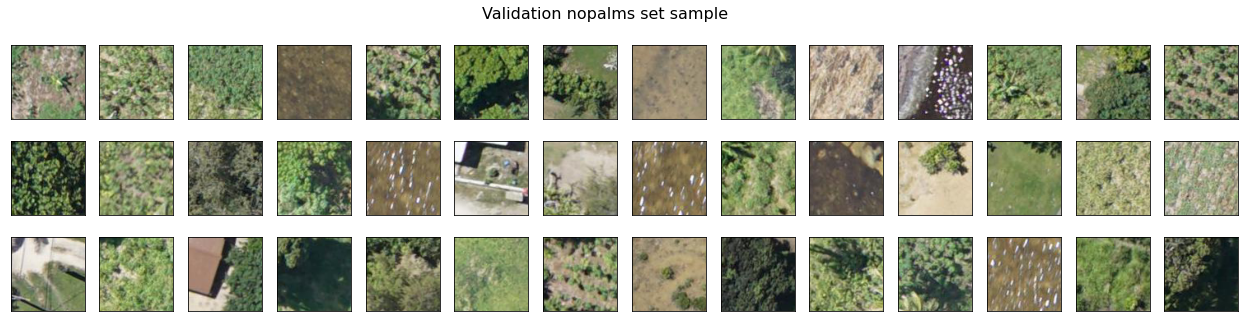

In [21]:
folder = saving_location
imgs = validation_list_nopalms
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Validation nopalms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path2 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path3 = os.path.join(folder, random.choice(imgs) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## Nopalm test dataset

In [22]:
test_list_nopalms = []
threshold = test_nb
dist_from_edges = 100
xpix_min, ypix_max = geoCoord2PixelPosition2(test_3857.geometry.x.min(), test_3857.geometry.y.min(), ulx, uly, xres, yres)
xpix_max, ypix_min = geoCoord2PixelPosition2(test_3857.geometry.x.max(), test_3857.geometry.y.max(), ulx, uly, xres, yres)

i_nopalm = 1
while i_nopalm < threshold+1:
    x_random = random.randint(dist_from_edges, raster_gdal.RasterXSize - dist_from_edges)
    y_random = random.randint(dist_from_edges + ypix_min, ypix_max - dist_from_edges)    
    palm_presence = palm_locations[(y_random-palm_location_radius):(y_random+palm_location_radius),
                                   (x_random-palm_location_radius):(x_random+palm_location_radius)].sum()
    
    if palm_presence == 0:
        saving_name = str(palm_number) + ".png"
        saving_location = "../data/test/"
        im = Image.fromarray(rasterArray_reshaped[(y_random-45):(y_random+45), (x_random-45):(x_random+45), :], 'RGB')
        im.save(saving_location + saving_name)
        i_nopalm += 1
        test_list_nopalms.append(str(palm_number))
        test_csv.append([palm_number,0])
 
        palm_number = palm_number + 1

The number of files in this directory is 8813.


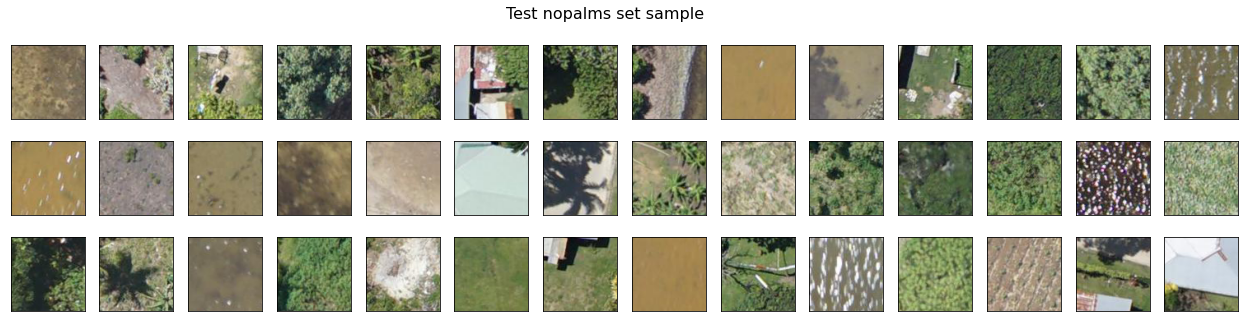

In [23]:
folder = saving_location
imgs = test_list_nopalms
print(f'The number of files in this directory is {len(imgs)}.')

cols = 14

fig, axs = plt.subplots(3, cols, figsize = (22,5))
fig.suptitle('Test nopalms set sample', fontsize=16, color = 'black')
for i in range(cols):
    img_path1 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path2 = os.path.join(folder, random.choice(imgs) + '.png')
    img_path3 = os.path.join(folder, random.choice(imgs) + '.png')
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)
    img3 = Image.open(img_path3)
    axs[0,i].imshow(img1)
    axs[1,i].imshow(img2)
    axs[2,i].imshow(img3)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

## CSV tables

In [24]:
# saving train, validation and test tables of image ids and labels
train_array = np.array(train_csv)
validation_array = np.array(validation_csv)
test_array = np.array(test_csv)

np.savetxt(f"../tables/train.csv", train_array, delimiter=',', fmt='%d')
np.savetxt(f"../tables/validation.csv", validation_array, delimiter=',', fmt='%d')
np.savetxt(f"../tables/test.csv", test_array, delimiter=',', fmt='%d')

## Train set corners

In [25]:
train_corners = []
boxsize = 90

for i in range(1, train_3857.shape[0]): 
    xpix, ypix = geoCoord2PixelPosition(train_3857.geometry.iloc[i], ulx, uly, xres, yres)
    x1,y1,x2,y2 = diagonalcorners(xpix, ypix, boxsize)
    train_corners.append([x1,y1,x2,y2])
    
for i in range(1, validation_3857.shape[0]): 
    xpix, ypix = geoCoord2PixelPosition(validation_3857.geometry.iloc[i], ulx, uly, xres, yres)
    x1,y1,x2,y2 = diagonalcorners(xpix, ypix, boxsize)
    train_corners.append([x1,y1,x2,y2])
    
train_corners = np.asarray(train_corners, dtype=int)

np.save('../tables/train_corners_groundtruth.npy', train_corners)

## Test set corners

In [26]:
# saving test palm corners into a csv, the corners are already referenced to the test RGB part
groundtruth_corners = []
boxsize = 90

for i in range(1, test_3857.shape[0]): 
    xpix, ypix = geoCoord2PixelPosition(test_3857.geometry.iloc[i], ulx, uly, xres, yres)
    x1,y1,x2,y2 = diagonalcorners(xpix, ypix-ypix_min, boxsize)
    groundtruth_corners.append([x1,y1,x2,y2])
    
groundtruth_corners = np.asarray(groundtruth_corners, dtype=int)

np.save('../tables/test_corners_groundtruth.npy', groundtruth_corners)

In [27]:
print('End of notebook.')

End of notebook.
